In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error , mean_squared_error

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df = pd.read_csv('./data/kaggle/kaggle_bike_train.csv')

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:xlabel='count', ylabel='Density'>

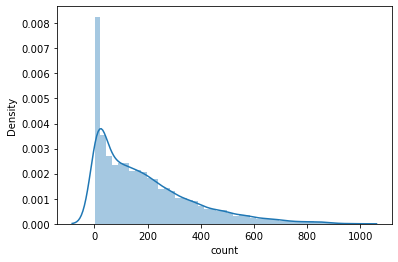

In [4]:
sns.distplot(bike_df['count'])

In [5]:
# datatime 형 변환
# 년, 월, 일, 시간 나누어보자

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

#apply 함수는 함수에 또 다른 함수를 호출해서 적용하게 하는 것


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year) 
bike_df['month']= bike_df.datetime.apply(lambda x : x.month) 
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day) 
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour) 

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [8]:
bike_df.drop(['datetime'], axis =1, inplace=True)

In [9]:
#sns.pairplot(bike_df)

In [10]:
#sns.pairplot(bike_df[['season','registered', 'casual', 'count']])

In [11]:
def evaluation_rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    error = (log_y - log_pred) ** 2
    return np.sqrt( np.mean(error) )

def evaluation(y, pred):
    mae   = mean_absolute_error(y, pred)
    mse   = mean_squared_error(y, pred)
    rmse  = np.sqrt(mean_squared_error(y, pred))
    rmsle = evaluation_rmsle(y, pred)
    
    print('MAE : {}, MSE : {}, RMSE : {}, RMSLE : {}'.format(mae, mse, rmse, rmsle))

In [12]:
y_target   = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 14), (2178, 14), (8708,), (2178,))

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

evaluation(y_test, linear_pred)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

evaluation(y_test, ridge_pred)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

evaluation(y_test, lasso_pred)

MAE : 2.5302655593646484e-13, MSE : 1.043229438913613e-25, RMSE : 3.2299062508277433e-13, RMSLE : 3.133092306792712e-14
MAE : 2.1378817175891097e-06, MSE : 1.0165014142206464e-11, RMSE : 3.188261931241921e-06, RMSLE : 1.9120387346761847e-07
MAE : 0.013685009711106132, MSE : 0.00041966226446925076, RMSE : 0.020485659971532545, RMSLE : 0.0009930903881668579


In [15]:
def error_data(y_test,pred) :
    error_data_df = pd.DataFrame(y_test.values, columns=['target'])
    error_data_df['prediction'] = np.round(pred)
    error_data_df['differ']     = np.abs( error_data_df['target'] - error_data_df['prediction'] )
    print( error_data_df.sort_values('differ', ascending=False))

In [16]:
error_data(y_test, linear_pred)

      target  prediction  differ
0        513       513.0     0.0
1454     118       118.0     0.0
1448     120       120.0     0.0
1449     220       220.0     0.0
1450      37        37.0     0.0
...      ...         ...     ...
720      184       184.0     0.0
719      446       446.0     0.0
718      392       392.0     0.0
717      221       221.0     0.0
2177     288       288.0     0.0

[2178 rows x 3 columns]


In [17]:
# 타겟에 대한 로그 변환, 피처는 X
# 시각화 살펴볼 것
# 학습 예측 평가

log_target = np.log1p(y_target)

<AxesSubplot:xlabel='count', ylabel='Density'>

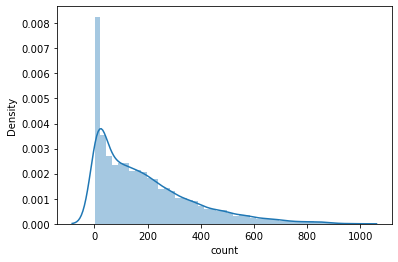

In [18]:
sns.distplot(y_target)

<AxesSubplot:xlabel='count', ylabel='Density'>

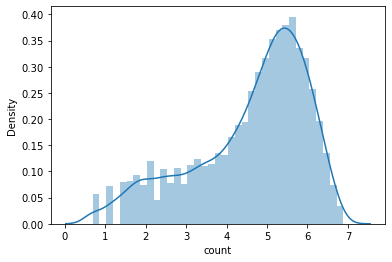

In [19]:
sns.distplot(log_target)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_features, log_target, test_size=0.2, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 14), (2178, 14), (8708,), (2178,))

In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

evaluation(y_test, linear_pred)

# 지수 np -> exp() , exp2(), expm1() 
# 값을 줄여놨으니, 다시 원복을 시켜놔야한다.

#y_test_exp = np.expm1(y_test)
evaluation(np.expm1(y_test), np.expm1(linear_pred))


MAE : 0.5393913493815742, MSE : 0.502486078743451, RMSE : 0.7088625245726078, RMSLE : 0.18622704970331005
MAE : 107.68976207017818, MSE : 155870.60215060294, RMSE : 394.8045113098417, RMSLE : 0.7088625245726066


<AxesSubplot:>

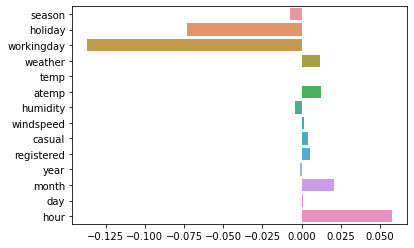

In [22]:
# 각 피처에 대한 회귀계수 회귀계수
coef_series = pd.Series(linear_model.coef_ , index=X_features.columns)
sns.barplot(x= coef_series.values, y= coef_series.index)

In [24]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace=True)

In [25]:
type(X_features)

NoneType

In [26]:
ohe_features = pd.get_dummies(X_features, columns =['season','holiday','workingday','weather','year','month','day','hour'])
ohe_features.info()

TypeError: object of type 'NoneType' has no len()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_features, log_target, test_size=0.2, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

evaluation( np.expm1(y_test), np.expm1(linear_pred))

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

evaluation( np.expm1(y_test), np.expm1(ridge_pred))

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

evaluation( np.expm1(y_test), np.expm1(lasso_pred))

In [ ]:
forest_model = RandomForestRegressor(n_estimators = 100)


# boost_model = GradientBoostingRegressor(n_estimators = 100)
# xgb_model = XGBRegressor(n_estimators = 100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_features, log_target, test_size=0.2, random_state=100)

forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
evaluation(np.expm1(y_test), np.expm1(forest_pred))

In [ ]:
def mode_pred(model, X_train, X_test, y_train, y_test)